On importe d'abord tous les modules nécessaires

In [ ]:
!pip install findiff
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
from findiff import FinDiff
import matplotlib.pyplot as plt

Ensuite, il y a plusieurs définitions
1. La taille de notre image (grid)
2. L'élément différentiel $\cfrac{d}{dx}$ en différences finies
3. L'élément de dérivée seconde $\cfrac{d^2}{dx^2}$ en différences finies
4. Le potentiel V(x) = $\cfrac{1}{2}x^2$ ici. Pour ce potentiel, on soustrait $\cfrac{1}{200}x^3$ si et seulement si $x > 0$. Donc le terme $(x>0)$ représente cette expression booléenne = 0 si non, 1 si oui. La correction cubique est seulement appliquée du côté $x > 0$ comme dans l'énoncé du devoir 2.
5. Les énergies et les états propres (fonction eigs). Cette fonction est dans scipy.sparse.linalg. Le $k=3$ spécifie qu'on veut trouver les trois valeurs les plus basses des valeurs propres / vecteurs propres. Et $SR$ veut dire $\textbf{smallest real part}$

In [ ]:
# Grid du problème ( on va de x = -20 à +20 )
x = np.linspace(-20, 20, 1001)

# Élément dx
dx = x[1]-x[0]

# Dérivée seconde de l'éq. de schrodinger avec un step de dx
d2_dx2 = FinDiff(0, dx, 2)

# Passage de la dérivée seconde en matrice (pour solve le problème en matrices)
K = -0.5 * d2_dx2.matrix(x.shape)

# Potentiel avec matrice diagonale
V = diags(0.5*x**2 - (x>0)*-0.005*x**3)
V_2 = diags(0.5*x**2)


# Énergies propres et valeurs propres
energies, states = eigs( K + V, k=3, which='SR') # Énergie corrigée
energies_2, states_2 = eigs( K+V_2, k=3, which='SR') # Énergie non corrigée

energy_diff = energies_2 - energies # Différence entre énergies non corrigées et corrigée
energy_ratio = energies_2 / energies # Ratio entre énergies non corrigées et corrigée

real_energy_diff = np.real(energy_diff)
real_energy_ratio = np.real(energy_ratio)

print("diffs : ", real_energy_diff)
print("ratios : ", real_energy_ratio)

energies_division = real_energy_diff[2] / (real_energy_diff[0])
print(r"E_0^1 / E_0^0 = ", energies_division)

diffs :  [-0.00139702 -0.00556094 -0.01177252]
ratios :  [0.99721346 0.99630579 0.99531185]
E_0^1 / E_0^0 =  8.426865623908366


Maintenant, nos valeurs propres et vecteurs propres sont calculés. On veut donc mettre sous forme graphique ce que ça donne.

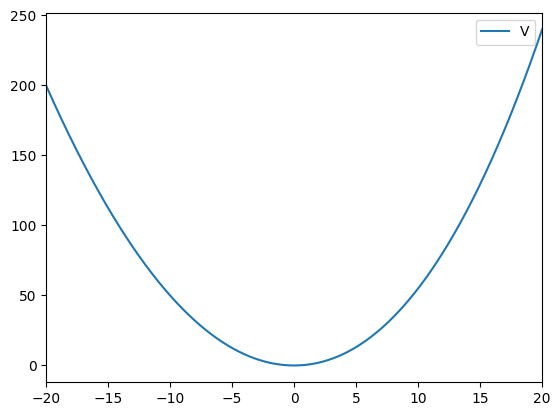

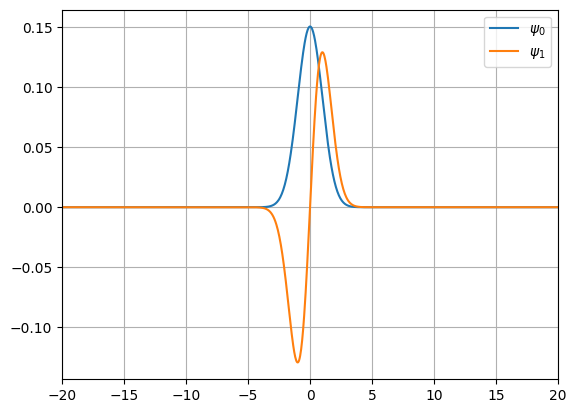

In [ ]:
# Se sépare en 2 graphiques

# 1. Plotting du potentiel défini plus haut
plt.plot(x, V.diagonal(), label=r'V')
plt.legend()
plt.xlim(min(x), max(x))
plt.show()


# 2. Plotting des eigenstates et eigenvalues trouvées à l'étape précédente.

# Toutes valeurs de psi en x du state fondamental
plt.plot(x, states[:, 0].real, label=r'$\psi_0$')

# Toutes valeurs de psi en x du state \psi_1
plt.plot(x, states[:, 1].real, label=r'$\psi_1$')

# Toutes valeurs de psi en x du state \psi_2
#plt.plot(x, states[:, 2].real, label=r'$\psi_2$') #irrelevant car k=2

# plt.plot(x, states[:, 60].real, label=r'$\psi_{60}$') # Plotting d'un état quasi classique pour voir la différence (psi_60)
plt.grid()
plt.legend()
plt.xlim(min(x), max(x))
plt.show()

On a maintenant l'apparance du potentiel et des états propres. Qu'en est-il des valeurs propres d'énergie ?



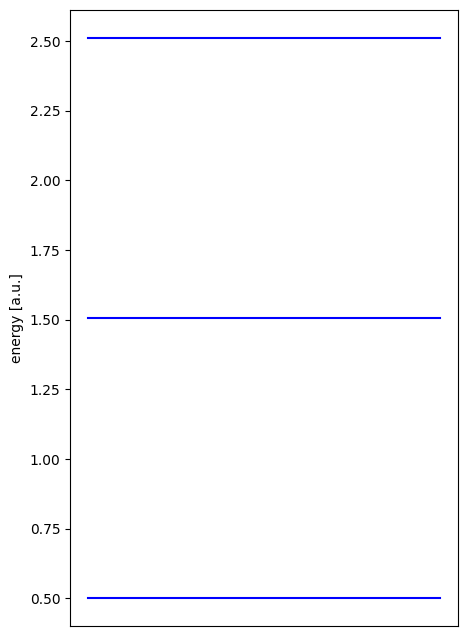

In [ ]:
# Taille de la figure
fig = plt.figure(figsize=(5,8))

# Regarde si un axe précis existe déjà, parce que notre figure a plusieurs fonctions maintenant, soit toutes les énergies
ax = fig.gca()

# Forloop pour graph toutes les énergies
levels = [[(0, 1), (e.real, e.real)] for e in energies]
for level in levels[:5]:
    ax.plot(level[0], level[1], '-b')

# Affichage graphique
ax.set_xticks([])
ax.set_ylabel('energy [a.u.]')
plt.show()